In [1]:
import pandas as pd

from utils import plot

In [2]:
gspc = pd.read_parquet('data/GSPC.parquet').reset_index()

In [3]:
gspc['Ticker'] = '^GSPC'

In [4]:
gspc

,Datetime,Open,High,Low,Close,Volume,Ticker
0,2020-01-28 09:30:00-05:00,3255.350098,3273.250000,3253.219971,3271.639893,0,^GSPC
1,2020-01-28 10:30:00-05:00,3271.199951,3278.439941,3270.459961,3277.850098,249209231,^GSPC
2,2020-01-28 11:30:00-05:00,3277.860107,3282.570068,3275.719971,3281.610107,182910058,^GSPC
3,2020-01-28 12:30:00-05:00,3281.590088,3281.959961,3274.919922,3276.320068,152018955,^GSPC
4,2020-01-28 13:30:00-05:00,3276.330078,3283.070068,3274.189941,3281.179932,161868381,^GSPC
...,...,...,...,...,...,...,...
3521,2022-01-26 11:30:00-05:00,4420.390137,4429.919922,4412.259766,4428.470215,253637547,^GSPC
3522,2022-01-26 12:30:00-05:00,4428.560059,4435.370117,4415.750000,4422.330078,254748000,^GSPC
3523,2022-01-26 13:30:00-05:00,4422.299805,4453.229980,4403.939941,4429.819824,351181000,^GSPC
3524,2022-01-26 14:30:00-05:00,4429.569824,4433.529785,4304.799805,4344.000000,598200000,^GSPC


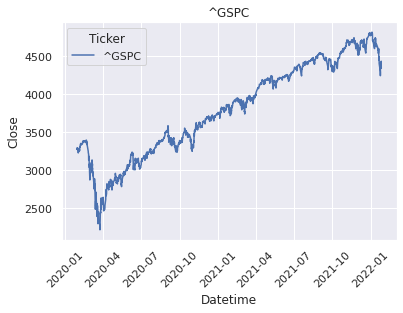

In [5]:
plot(df=gspc, x='Datetime', y='Close', hue='Ticker', title='^GSPC', save_name='GSPC_2020_2021')

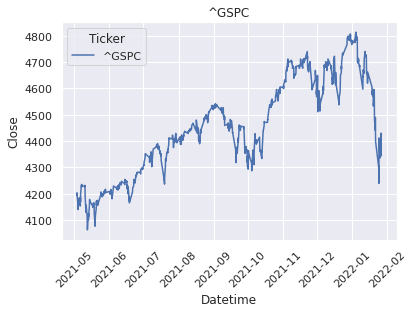

In [6]:
plot(df=gspc[gspc.Datetime > '2021-05-01'], x='Datetime', hue='Ticker', y='Close', title='^GSPC', save_name='GSPC_2021')

In [7]:
data = pd.read_parquet('data/clean/60m/data_clean_60m_close.parquet')

In [8]:
data = data[data.index < '2022-01-25']

In [9]:
data

,SBUX,ISRG,KIM,QCOM,GL,WFC,CRM,STT,WMT,AON,...,UAA,EFX,HII,APD,O,DPZ,ETN,CNC,TFC,GE
Datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-29 10:30:00-05:00,86.550003,574.609985,20.230000,88.120003,105.959999,47.674999,182.610001,77.400002,117.070000,217.705002,...,21.440001,155.050003,269.410004,236.934998,78.525002,284.299988,97.260002,65.739998,54.870300,103.639999
2020-01-29 11:30:00-05:00,86.050003,575.455017,20.230000,88.139999,105.989998,47.654999,183.220001,77.072502,116.860001,217.639999,...,21.230000,155.039993,263.200012,236.765106,78.635002,285.570007,97.070000,65.544998,54.799999,103.360001
2020-01-29 12:30:00-05:00,86.269997,576.500000,20.230000,88.425003,106.180000,47.709999,183.369995,76.855003,116.940002,217.679993,...,21.160000,155.190002,264.339996,237.384995,78.536499,285.625488,97.059998,65.570000,54.654999,103.239998
2020-01-29 13:30:00-05:00,87.065002,576.543030,20.160000,88.330002,106.180000,47.689999,183.660004,76.989998,116.713402,217.839996,...,21.160000,155.570007,264.839996,237.110001,78.389999,286.109985,97.135002,65.800003,54.195000,103.480003
2020-01-29 14:30:00-05:00,87.228996,574.309998,20.120001,88.324997,105.930000,47.415001,182.800003,76.430000,116.496803,217.330002,...,21.084999,154.839996,264.709991,237.339996,78.320000,286.179993,97.125000,65.459999,53.930000,103.199997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-24 11:30:00-05:00,96.309998,269.279999,23.680000,164.860001,100.989998,53.660000,218.600006,90.930000,140.119995,266.359985,...,18.770000,225.570007,191.059998,282.429993,67.910004,434.799988,160.490005,77.129997,61.459999,96.290001
2022-01-24 12:30:00-05:00,96.309998,269.279999,23.680000,164.860001,100.989998,53.660000,218.600006,90.930000,140.119995,266.359985,...,18.770000,225.570007,191.059998,282.429993,67.910004,434.799988,160.490005,77.129997,61.459999,96.290001
2022-01-24 13:30:00-05:00,96.309998,269.279999,23.680000,164.860001,100.989998,53.660000,218.600006,90.930000,140.119995,266.359985,...,18.770000,225.570007,191.059998,282.429993,67.910004,434.799988,160.490005,77.129997,61.459999,96.290001


In [10]:
stocks = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'TSLA', 'GOOG', 'FB', 'NVDA']

In [11]:
df = data[stocks]

In [12]:
df = df[df.index > '2021-07-01']

In [13]:
df = df[stocks] / df[stocks].iloc[0]

In [14]:
df = df.melt(var_name='Ticker', value_name='Close', ignore_index=False).reset_index()

In [15]:
df.rename(columns={'Close': 'Normalized Close'}, inplace=True)
df

,Datetime,Ticker,Normalized Close
0,2021-07-01 09:30:00-04:00,AAPL,1.000000
1,2021-07-01 10:30:00-04:00,AAPL,0.996001
2,2021-07-01 11:30:00-04:00,AAPL,0.998820
3,2021-07-01 12:30:00-04:00,AAPL,0.997869
4,2021-07-01 13:30:00-04:00,AAPL,1.001383
...,...,...,...
7979,2022-01-24 11:30:00-05:00,NVDA,1.156557
7980,2022-01-24 12:30:00-05:00,NVDA,1.156557
7981,2022-01-24 13:30:00-05:00,NVDA,1.156557
7982,2022-01-24 14:30:00-05:00,NVDA,1.156557


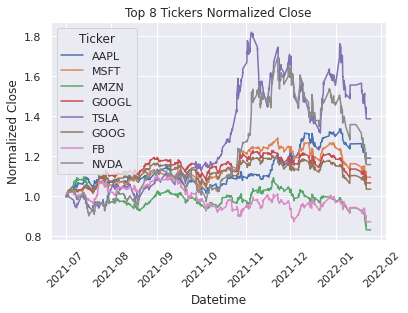

In [16]:
plot(df=df, x='Datetime', y='Normalized Close', hue='Ticker', title='Top 8 Tickers Normalized Close',
     save_name='top8_norm')

In [17]:
df = data.copy()

In [18]:
df = df[df.index > '2021-07-01']
df

,SBUX,ISRG,KIM,QCOM,GL,WFC,CRM,STT,WMT,AON,...,UAA,EFX,HII,APD,O,DPZ,ETN,CNC,TFC,GE
Datetime,,,,,,,,,,,,,,,,,,,,,
2021-07-01 09:30:00-04:00,113.059998,921.940002,20.980000,142.149994,95.464996,45.435001,244.895004,83.050003,140.070007,238.690002,...,21.589199,241.119995,211.615005,289.269989,66.430000,465.829987,150.029999,73.389999,56.180000,107.599998
2021-07-01 10:30:00-04:00,112.790001,922.979980,21.120001,140.966003,95.489998,45.549999,243.190002,83.349998,139.940002,238.399994,...,21.355000,240.889999,212.309998,290.339996,66.845001,462.100006,150.660004,73.489998,56.209999,108.199997
2021-07-01 11:30:00-04:00,112.849998,923.080017,21.170000,141.289993,95.345001,45.355000,243.250000,83.400002,139.759995,238.889999,...,21.295000,242.229996,211.445007,288.345001,67.451401,463.059998,150.360001,73.434998,55.959999,108.080002
2021-07-01 12:30:00-04:00,112.894997,923.890015,21.245001,141.000000,95.779999,45.465000,242.929993,83.790001,139.779999,238.990005,...,21.235001,241.429993,211.440002,288.660004,67.279999,462.440002,150.199997,73.595001,56.070000,107.680000
2021-07-01 13:30:00-04:00,113.125000,926.030029,21.200001,141.169998,95.830002,45.450001,243.835007,83.959999,139.851196,239.350006,...,21.272600,241.429993,211.955002,288.890015,67.120003,464.660004,149.975006,73.724998,56.150002,107.320000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-24 11:30:00-05:00,96.309998,269.279999,23.680000,164.860001,100.989998,53.660000,218.600006,90.930000,140.119995,266.359985,...,18.770000,225.570007,191.059998,282.429993,67.910004,434.799988,160.490005,77.129997,61.459999,96.290001
2022-01-24 12:30:00-05:00,96.309998,269.279999,23.680000,164.860001,100.989998,53.660000,218.600006,90.930000,140.119995,266.359985,...,18.770000,225.570007,191.059998,282.429993,67.910004,434.799988,160.490005,77.129997,61.459999,96.290001
2022-01-24 13:30:00-05:00,96.309998,269.279999,23.680000,164.860001,100.989998,53.660000,218.600006,90.930000,140.119995,266.359985,...,18.770000,225.570007,191.059998,282.429993,67.910004,434.799988,160.490005,77.129997,61.459999,96.290001


In [19]:
df = df / df.iloc[0]
df

,SBUX,ISRG,KIM,QCOM,GL,WFC,CRM,STT,WMT,AON,...,UAA,EFX,HII,APD,O,DPZ,ETN,CNC,TFC,GE
Datetime,,,,,,,,,,,,,,,,,,,,,
2021-07-01 09:30:00-04:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2021-07-01 10:30:00-04:00,0.997612,1.001128,1.006673,0.991671,1.000262,1.002531,0.993038,1.003612,0.999072,0.998785,...,0.989152,0.999046,1.003284,1.003699,1.006247,0.991993,1.004199,1.001363,1.000534,1.005576
2021-07-01 11:30:00-04:00,0.998143,1.001237,1.009056,0.993950,0.998743,0.998239,0.993283,1.004214,0.997787,1.000838,...,0.986373,1.004604,0.999197,0.996802,1.015376,0.994054,1.002200,1.000613,0.996084,1.004461
2021-07-01 12:30:00-04:00,0.998541,1.002115,1.012631,0.991910,1.003300,1.000660,0.991976,1.008910,0.997930,1.001257,...,0.983594,1.001286,0.999173,0.997891,1.012795,0.992723,1.001133,1.002793,0.998042,1.000744
2021-07-01 13:30:00-04:00,1.000575,1.004436,1.010486,0.993106,1.003823,1.000330,0.995672,1.010957,0.998438,1.002765,...,0.985335,1.001286,1.001607,0.998686,1.010387,0.997488,0.999633,1.004565,0.999466,0.997398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-24 11:30:00-05:00,0.851849,0.292080,1.128694,1.159761,1.057875,1.181028,0.892627,1.094883,1.000357,1.115924,...,0.869416,0.935509,0.902866,0.976354,1.022279,0.933388,1.069719,1.050961,1.093984,0.894888
2022-01-24 12:30:00-05:00,0.851849,0.292080,1.128694,1.159761,1.057875,1.181028,0.892627,1.094883,1.000357,1.115924,...,0.869416,0.935509,0.902866,0.976354,1.022279,0.933388,1.069719,1.050961,1.093984,0.894888
2022-01-24 13:30:00-05:00,0.851849,0.292080,1.128694,1.159761,1.057875,1.181028,0.892627,1.094883,1.000357,1.115924,...,0.869416,0.935509,0.902866,0.976354,1.022279,0.933388,1.069719,1.050961,1.093984,0.894888


In [20]:
asset_details = pd.read_csv('tickers/s&p.csv', index_col=0)

In [21]:
df = df.T.join(asset_details[['Sector']]).groupby(by='Sector').mean().T
df

Sector,Communication Services,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Utilities
2021-07-01 09:30:00-04:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2021-07-01 10:30:00-04:00,0.996761,0.997004,1.002293,0.997759,1.002256,1.000771,1.001510,0.996783,1.003160,1.004714,1.006029
2021-07-01 11:30:00-04:00,0.997948,0.997365,1.002910,1.002997,1.000863,1.002186,1.000235,0.998547,1.001624,1.009164,1.007887
2021-07-01 12:30:00-04:00,0.999068,0.998182,1.002672,1.008061,1.002708,1.003152,1.001460,0.998181,1.002471,1.011035,1.009823
2021-07-01 13:30:00-04:00,1.000217,0.998128,1.002149,1.001905,1.003346,1.004846,1.000898,0.999911,1.001832,1.007829,1.009500
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-24 11:30:00-05:00,0.873679,0.932157,1.061256,1.167291,1.044047,0.978358,0.987110,0.981283,1.017991,1.071336,1.068926
2022-01-24 12:30:00-05:00,0.873679,0.932334,1.061256,1.167291,1.044049,0.978358,0.987130,0.981364,1.017991,1.071336,1.068926
2022-01-24 13:30:00-05:00,0.873679,0.932401,1.061256,1.167291,1.044145,0.978358,0.987153,0.981381,1.017991,1.071336,1.068926
2022-01-24 14:30:00-05:00,0.873679,0.932508,1.061256,1.167291,1.044348,0.978358,0.987290,0.981549,1.017991,1.071336,1.068926


In [22]:
df = df.melt(var_name='Sector', value_name='Normalized Average Close', ignore_index=False).reset_index()
df

,index,Sector,Normalized Average Close
0,2021-07-01 09:30:00-04:00,Communication Services,1.000000
1,2021-07-01 10:30:00-04:00,Communication Services,0.996761
2,2021-07-01 11:30:00-04:00,Communication Services,0.997948
3,2021-07-01 12:30:00-04:00,Communication Services,0.999068
4,2021-07-01 13:30:00-04:00,Communication Services,1.000217
...,...,...,...
10973,2022-01-24 11:30:00-05:00,Utilities,1.068926
10974,2022-01-24 12:30:00-05:00,Utilities,1.068926
10975,2022-01-24 13:30:00-05:00,Utilities,1.068926
10976,2022-01-24 14:30:00-05:00,Utilities,1.068926


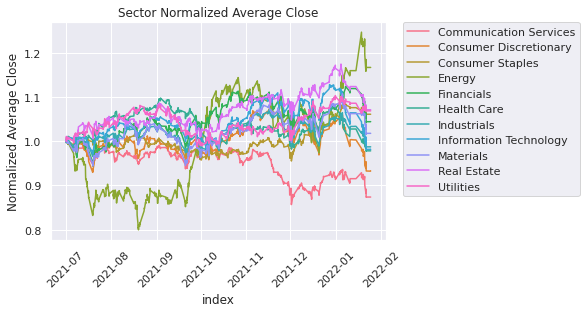

In [23]:
plot(df=df, x='index', y='Normalized Average Close', hue='Sector', title='Sector Normalized Average Close',
     save_name='sector_norm', outside_legend=True)